Cassidy Cao (cjc379), Bjorn Kvaale (bek67)

# Homework #4: Simulation and Modeling

This notebook contains solutions to ORIE 4580 Homework #4 by Cassidy Cao (cjc379) and Bjorn Kvaale (bek67). The problems involve building and analyzing simulation models for various scenarios, including supplier selection, power consumption, and trash mass accumulation. Each section includes code, results, and explanations to support the analysis and findings. The notebook demonstrates the use of Python libraries such as NumPy, pandas, SciPy, and Matplotlib for statistical modeling and data visualization.

**Import packages:**

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import scipy.linalg as scl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import math

### Question #1

Building the model:

In [92]:
def simulation(sims, ERM, HM, CS, CW):
    ERM_cost=10
    HM_cost=11.2
    CS_cost=12.3
    CW_cost=15
    ERM_cap=2000*ERM
    HM_cap=3000*HM
    CS_cap=2000*CS
    CW_cap=3000*CW
    small=10
    large=2
    small_dem=200
    large_dem=2500
    costs=[]
    tri_min=16
    tri_max=30
    most_likely=20
    base_cap = (ERM_cap + HM_cap + CS_cap + CW_cap)*.8
    base_cost = 0.8*(ERM_cost*ERM_cap + HM_cost*HM_cap + CS_cost*CS_cap + CW_cost*CW_cap)
    for i in range(sims):
        demand=4000
        for i in range(small):
            success_small = np.random.binomial(1,.5)
            if success_small == 1:
                demand += small_dem
            else:
                demand= demand
        for i in range(large):
            success_large = np.random.binomial(1,.4)
            if success_large == 1:
                demand += large_dem
            else:
                demand = demand
        if demand > ERM_cap + HM_cap + CS_cap + CW_cap:
            spot_price = np.random.triangular(tri_min, most_likely, tri_max)
            spot_cost= (demand-(ERM_cap + HM_cap + CS_cap + CW_cap))*spot_price
            total_cost = ERM_cost*ERM_cap + HM_cost*HM_cap + CS_cost*CS_cap + CW_cost*CW_cap + spot_cost
        elif demand <= base_cap:
            total_cost = base_cost
        else:
            if demand - base_cap <= ERM_cap*.2:  
                total_cost= base_cost+(demand-base_cap)*ERM_cost
            elif demand - base_cap-ERM_cap*.2 <= HM_cap*.2:
                total_cost= base_cost+(ERM_cap)*.2*ERM_cost + (demand - base_cap-ERM_cap*.2)*HM_cost
            elif demand - base_cap-ERM_cap*.2 - HM_cap*.2 <= CS_cap*.2:
                total_cost= base_cost+(ERM_cap)*.2*ERM_cost + HM_cap*.2*HM_cost + (demand - base_cap - ERM_cap*.2-HM_cap*.2)*CS_cost
            else:
                total_cost= base_cost+(ERM_cap)*.2*ERM_cost + HM_cap*.2*HM_cost + CS_cap*.2*CS_cost + (demand - base_cap - ERM_cap*.2-HM_cap*.2 - CS_cap*.2)*CW_cost
        costs.append(total_cost)
    
    expected_cost = np.mean(costs)
    median=np.median(costs)
    percentile_10=round(np.percentile(costs,10),3)
    percentile_90=round(np.percentile(costs,90),3)
    total_variance= np.var(costs)
    half_width = 1.96*(total_variance**(.5))/(sims**(.5))
    lower=round(expected_cost-half_width, 3)
    upper=round(expected_cost+half_width, 3)
    CI=[lower,upper]
    return round(expected_cost,3),round(median,3),percentile_10,percentile_90,CI, costs

#### Part A:

In [99]:
Part_1A=simulation(10000,1,1,1,1)
print("10th percentile is: ", Part_1A[2])
print("Median is: ", Part_1A[1])
print("90th percentile is: ", Part_1A[3])
print("95% confidence interval is: ", Part_1A[4])

10th percentile is:  98560.0
Median is:  98560.0
90th percentile is:  120200.0
95% confidence interval is:  [102476.397, 102853.32]


In [85]:
def optimal(sims):
    options = [] 
    subset= []
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    a = simulation(sims,i,j,k,l)
                    options.append(a[0])
                    subset.append([i,j,k,l])
    minimum = min(options)
    min_index = options.index(minimum)
    subset_index = subset[min_index]
    return minimum, subset_index

In [86]:
Part_1B= optimal(1000)
print("Optimal Expected Cost is: ", Part_1B[0])
print("With ", Part_1B[1], "for [ERM, HM, CS, CM] where 1 means you use them as a supplier, 0 means you do not")

Optimal Expected Cost is:  88308.711
With  [1, 1, 1, 0] for [ERM, HM, CS, CM] where 1 means you use them as a supplier, 0 means you do not


### Question #2

#### Part A:

In [101]:
def simulation2(sims):
    consumptions_over_140=[]
    for i in range(sims):
        X = np.random.normal(2.5, 0.5, size=50)
        total_power_consumption=sum(X)
        if 140 < total_power_consumption:
            consumptions_over_140.append(1)   
        else:
            consumptions_over_140.append(0)
    prob=sum(consumptions_over_140)/sims
    return prob

In [108]:
simulation2(3000000)

1.0333333333333333e-05

#### Part B:

In [51]:
pre_cov_matrix=[]
list1=[]
for i in range(50):
    list1.append(0.1)
for i in range(50):
    pre_cov_matrix.append(list1)
cov_matrix = np.matrix(pre_cov_matrix)
np.fill_diagonal(cov_matrix, 0.25)

print(cov_matrix)   
L = scl.cholesky(cov_matrix, lower=True)

mu=[]
for i in range(50):
    mu.append(2.5)

def simulation2b(sims):
    consumptions_over_140=[]
    for i in range(sims):
        N = np.random.normal(0, 1, size=50)
        X = mu + np.dot(L,N)
        total_power_consumption=sum(X)
        if 140 < total_power_consumption:
            consumptions_over_140.append(1)   
        else:
            consumptions_over_140.append(0)
    prob=sum(consumptions_over_140)/sims
    return prob

[[0.25 0.1  0.1  ... 0.1  0.1  0.1 ]
 [0.1  0.25 0.1  ... 0.1  0.1  0.1 ]
 [0.1  0.1  0.25 ... 0.1  0.1  0.1 ]
 ...
 [0.1  0.1  0.1  ... 0.25 0.1  0.1 ]
 [0.1  0.1  0.1  ... 0.1  0.25 0.1 ]
 [0.1  0.1  0.1  ... 0.1  0.1  0.25]]


In [52]:
simulation2b(10000)

0.1738

In [19]:
rv= np.random.normal(2.5, 0.25)
print(rv)

2.84787006746101


### Question #3

In [3]:
# Poisson, histogram of total mass of trash received 7am to 11am 
lam= 1
exp_mean= 70
gamma_mean= 1000
gamma_sd= 400

time= (11-7)*60
gamma_shape= (gamma_mean**2)/(gamma_sd**2)
gamma_scale= (gamma_sd**2)/(gamma_mean)

In [4]:
def mass():
    time_passed=0
    total_mass=0
    arrival_times=[]
    masses=[]
    while time_passed < time:
        time_U= np.random.uniform(0,1)
        arrival_time_after_prev= -math.log(1-time_U)/lam
        time_passed += arrival_time_after_prev
        arrival_times.append(time_passed)
        vehicle_type = np.random.binomial(1,.5)
        if vehicle_type ==0:
            total_mass += np.random.exponential(exp_mean)
            
        else:
            total_mass += np.random.gamma(gamma_shape,gamma_scale)      
        masses.append(total_mass)
    return arrival_times, masses, total_mass

In [8]:
def simulation3(sims):
    simulation_3=[]
    for i in range(sims):
        x=mass()
        simulation_3.append(x[2])
    return simulation_3

Text(0.5, 1.0, 'Number of Occurances vs Mass')

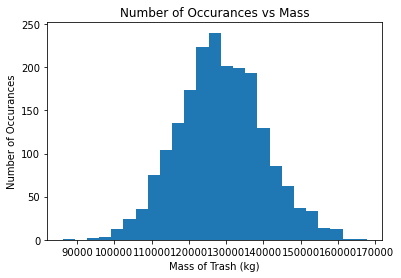

In [12]:
x_1=simulation3(2000)
plt.hist(x_1, bins=25, density=False)
plt.xlabel("Mass of Trash (kg)")
plt.ylabel("Number of Occurances")
plt.title("Number of Occurances vs Mass")

Text(0.5, 1.0, 'Mass vs Time')

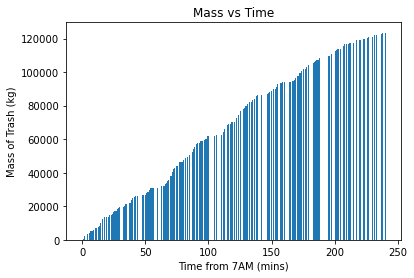

In [9]:
x_2= mass()
plt.bar(x_2[0],x_2[1])
plt.xlabel("Time from 7AM (mins)")
plt.ylabel("Mass of Trash (kg)")
plt.title("Mass vs Time")